# Research Question 2:
What is the association between health care access, socio-demographics and HIV screening? Could we predict the chances that individuals are getting HIV tests based on their race, income, education, insurance coverage and access to personal doctors?

## Data Exploration and pre-processing
Similar to Q1, we need to classify data and predict variables.
Note the feature values are strings, which need to be labeled before analysis. 

## Data analysis
We use KNN for classification. Pearson's coefficient is also examined for related variables. 

## Results
Anwsers to 'ever tested for HIV?' are divided into 5 categories: No，Yes，Not asked or Missing，Don't know/Not Sure and Refused. Samples are unbalanced amongst the answers. 
No strong correlation is identified among the variables through Pearson's coefficient. 
We use KNN for model building and sklearn metrics for model evaluation. 
After experiment, K=69 is decided. 

## Limitations
Accuracy for prediction is around 60%. 
After obtaining more balanced data samples, we could expect to improve accuracy. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn import tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('brfss_for_bda_2021.csv')
print(data.isnull().sum())
data.fillna(data.mean())

_STATE         0
_GEOSTR        0
_DENSTR2       0
PRECALL        0
SECSCRFL    3911
            ... 
cracorg1       0
_prace1        0
mracasc1       0
_impcty        0
mracorg1       0
Length: 414, dtype: int64


,_STATE,_GEOSTR,_DENSTR2,PRECALL,SECSCRFL,REPNUM,REPDEPTH,FMONTH,IDATE,IMONTH,...,PPS_45,PPS_46,PPS_48,PPS_52,childage,cracorg1,_prace1,mracasc1,_impcty,mracorg1
0,New York,207,D,To be called,2.627151,40187,5,April,4092015,April,...,No,No,No,Yes,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...
1,New York,207,D,To be called,2.627151,60025,21,June,6232015,June,...,No,No,No,Yes,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...
2,New York,203,D,To be called,2.627151,120050,3,December,12282015,December,...,No,No,No,No,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...
3,New York,206,D,To be called,2.627151,30066,28,March,3182015,March,...,No,No,No,No,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...
4,New York,203,D,To be called,2.627151,110026,23,November,11292015,November,...,No,No,No,No,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12333,New York,207,D,To be called,2.627151,40007,14,April,4162015,April,...,No,No,No,Yes,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...
12334,New York,207,D,To be called,0.000000,60048,8,June,7102015,July,...,No,No,No,Yes,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...
12335,New York,207,D,To be called,0.000000,70002,4,July,8152015,August,...,No,No,No,Yes,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...
12336,New York,207,D,To be called,0.000000,70019,20,July,8092015,August,...,No,No,No,Yes,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...


***** HIVTST6 status statistics *****
No                      6190
Yes                     4292
Not asked or Missing    1610
Don't know/Not Sure      206
Refused                   40
Name: HIVTST6, dtype: int64


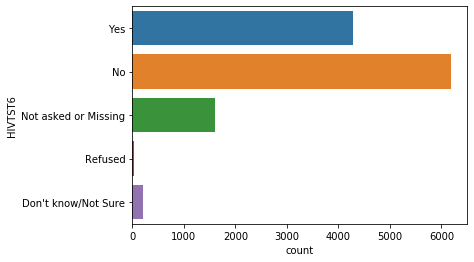

In [3]:
print("***** HIVTST6 status statistics *****")
print(data.HIVTST6.value_counts())
sns.countplot(y='HIVTST6', data=data)

In [4]:
data = data.loc[data['HIVTST6'].isin(['Yes','No'])]

In [5]:
# Feature selection
x=data[['_prace1','_INCOMG','EDUCA','HLTHPLN1','PERSDOC2']]
y=data[['HIVTST6']]

In [6]:
# Labeling
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(x['_prace1'])
x._prace1 = le.transform(x._prace1)
# ----------------------------
le = LabelEncoder()
le.fit(x['_INCOMG'])
x._INCOMG = le.transform(x._INCOMG)
# ----------------------------
le = LabelEncoder()
le.fit(x['EDUCA'])
x.EDUCA = le.transform(x.EDUCA)
# ----------------------------
le = LabelEncoder()
le.fit(x['HLTHPLN1'])
x.HLTHPLN1 = le.transform(x.HLTHPLN1)
# ----------------------------
le = LabelEncoder()
le.fit(x['PERSDOC2'])
x.PERSDOC2 = le.transform(x.PERSDOC2)

Correlation matrix：
           _prace1   _INCOMG     EDUCA  HLTHPLN1  PERSDOC2
_prace1       NaN       NaN       NaN       NaN       NaN
_INCOMG       NaN  1.000000  0.021898  0.024247 -0.005749
EDUCA         NaN  0.021898  1.000000 -0.137023 -0.075383
HLTHPLN1      NaN  0.024247 -0.137023  1.000000  0.204161
PERSDOC2      NaN -0.005749 -0.075383  0.204161  1.000000


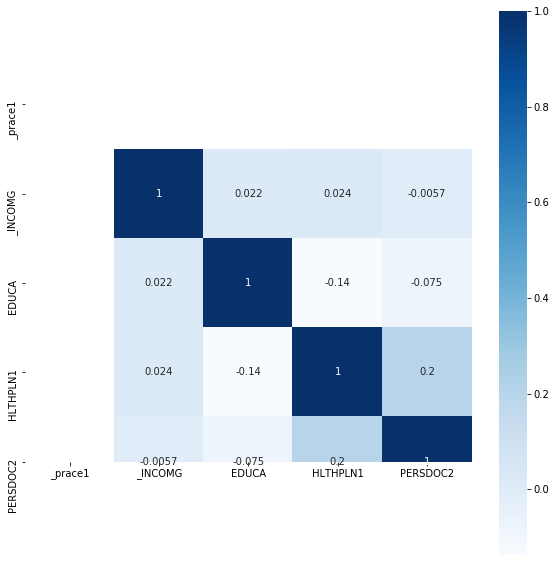

In [7]:
# Visualize
data_choose=x.join(y, how='outer')
data_choose.to_csv('Result2.csv')
dt_corr = data_choose.corr(method = 'pearson')
print('Correlation matrix：\n',dt_corr)
plt.subplots(figsize=(10, 10))
sns.heatmap(dt_corr, annot=True, vmax=1, square=True, cmap='Blues')
plt.show()

## KNN Model

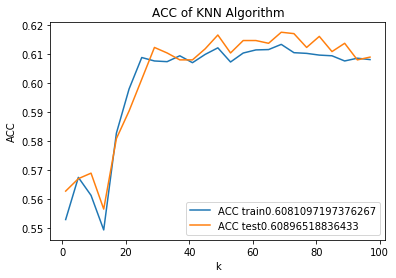

optimal alpha for which auc is maximum :  69
最佳参数下的模型评估
0.5689079637577492
              precision    recall  f1-score   support

          No       0.66      0.57      0.61      1259
         Yes       0.47      0.56      0.51       838

    accuracy                           0.57      2097
   macro avg       0.57      0.57      0.56      2097
weighted avg       0.59      0.57      0.57      2097

[[720 539]
 [365 473]]


In [25]:
'''spliting data'''
# spliting training and testing dataset into 8:2
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=10)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import math

k = list(range(1,100,4))

train_auc = []
test_auc = []

for i in k:
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(x_train,y_train)
    pred_test = clf.predict(x_test)
    test_auc.append(accuracy_score(y_test,pred_test))
    pred_train = clf.predict(x_train)
    train_auc.append(accuracy_score(y_train,pred_train))
optimal_k = k[test_auc.index(max(test_auc))]
# k = [math.log(x) for x in k]
k = [x for x in k]

#plot auc vs alpha
x = plt.subplot( )
x.plot(k, train_auc, label='ACC train'+str(accuracy_score(y_train,pred_train)))
x.plot(k, test_auc, label='ACC test'+str(accuracy_score(y_test,pred_test)))
plt.title('ACC of KNN Algorithm')
plt.xlabel('k')
plt.ylabel('ACC')
x.legend()
plt.show()
print('optimal alpha for which auc is maximum : ',optimal_k)

# Model evaluation
print('Model evaluation')
clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(x_train, y_train)
pred_test = clf.predict(x_test)
pred_train = clf.predict(x_train)
print(accuracy_score(y_test, pred_test))
print(classification_report(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))